In [109]:
# Solar Power Generation 
import pandas as pd 
import numpy as np 
df = pd.read_csv("solarpower.csv")
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

In [110]:
df.shape

(2920, 10)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [112]:
df.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

In [113]:
# Checking Missing Values
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [114]:
missing = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_df = pd.DataFrame({
    "Missing Values": missing,
    "Missing %": missing_percentage
})
missing_df

Missing Values  Missing %
distance-to-solar-noon                    0       0.00
temperature                               0       0.00
wind-direction                            0       0.00
wind-speed                                0       0.00
sky-cover                                 0       0.00
visibility                                0       0.00
humidity                                  0       0.00
average-wind-speed-(period)               1       0.03
average-pressure-(period)                 0       0.00
power-generated                           0       0.00

In [115]:
df.duplicated().sum()

np.int64(0)

In [116]:
df.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

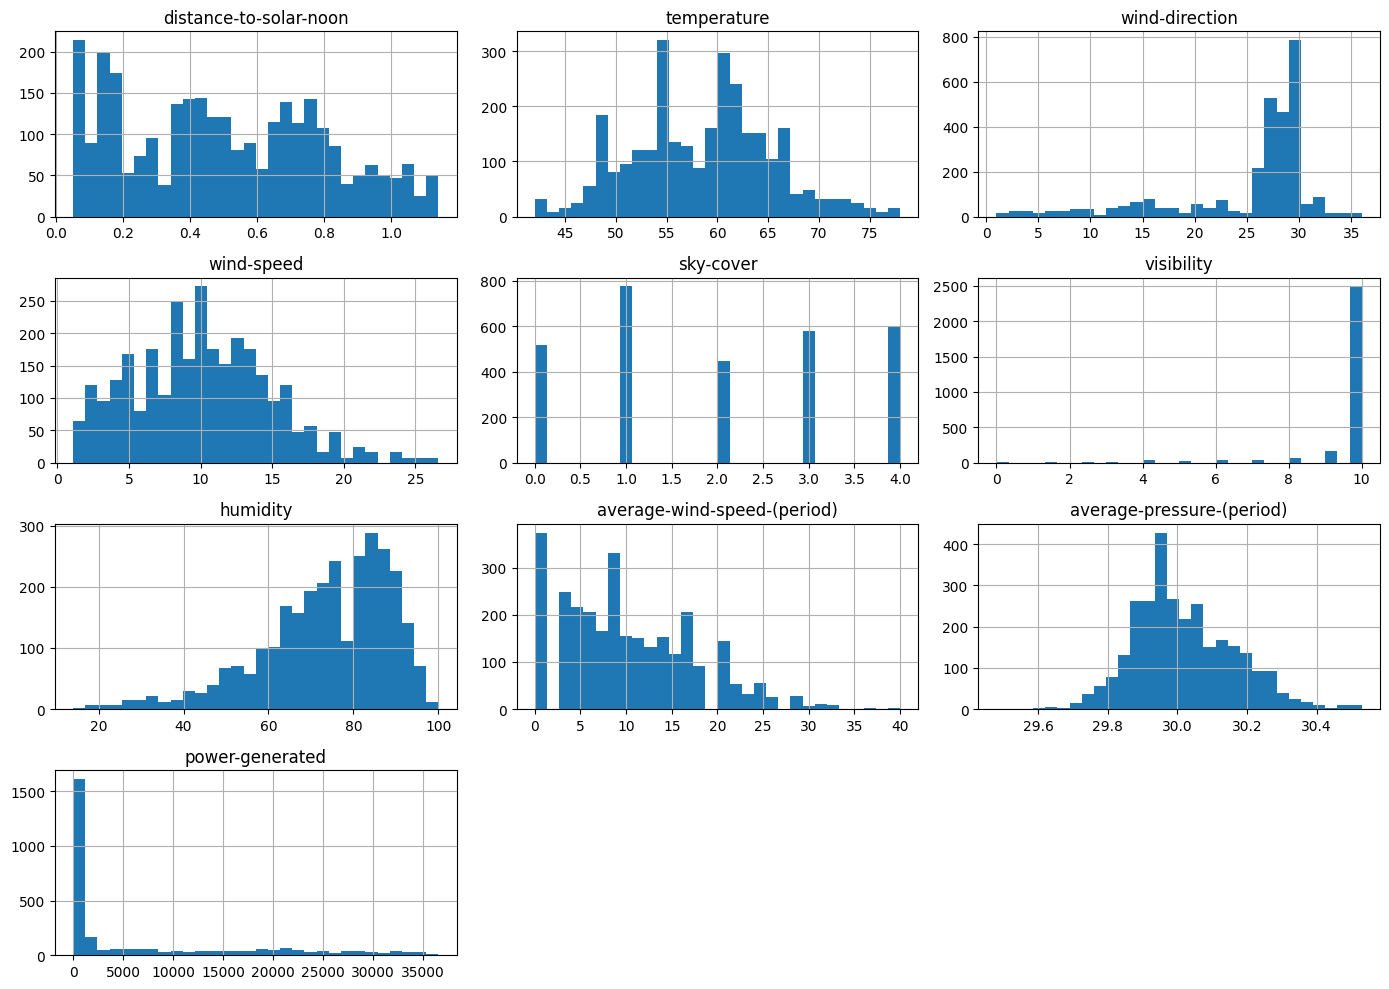

In [117]:
# Data Visualization

# Univariate Analysis
# Histogram
import matplotlib.pyplot as plt
df.hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

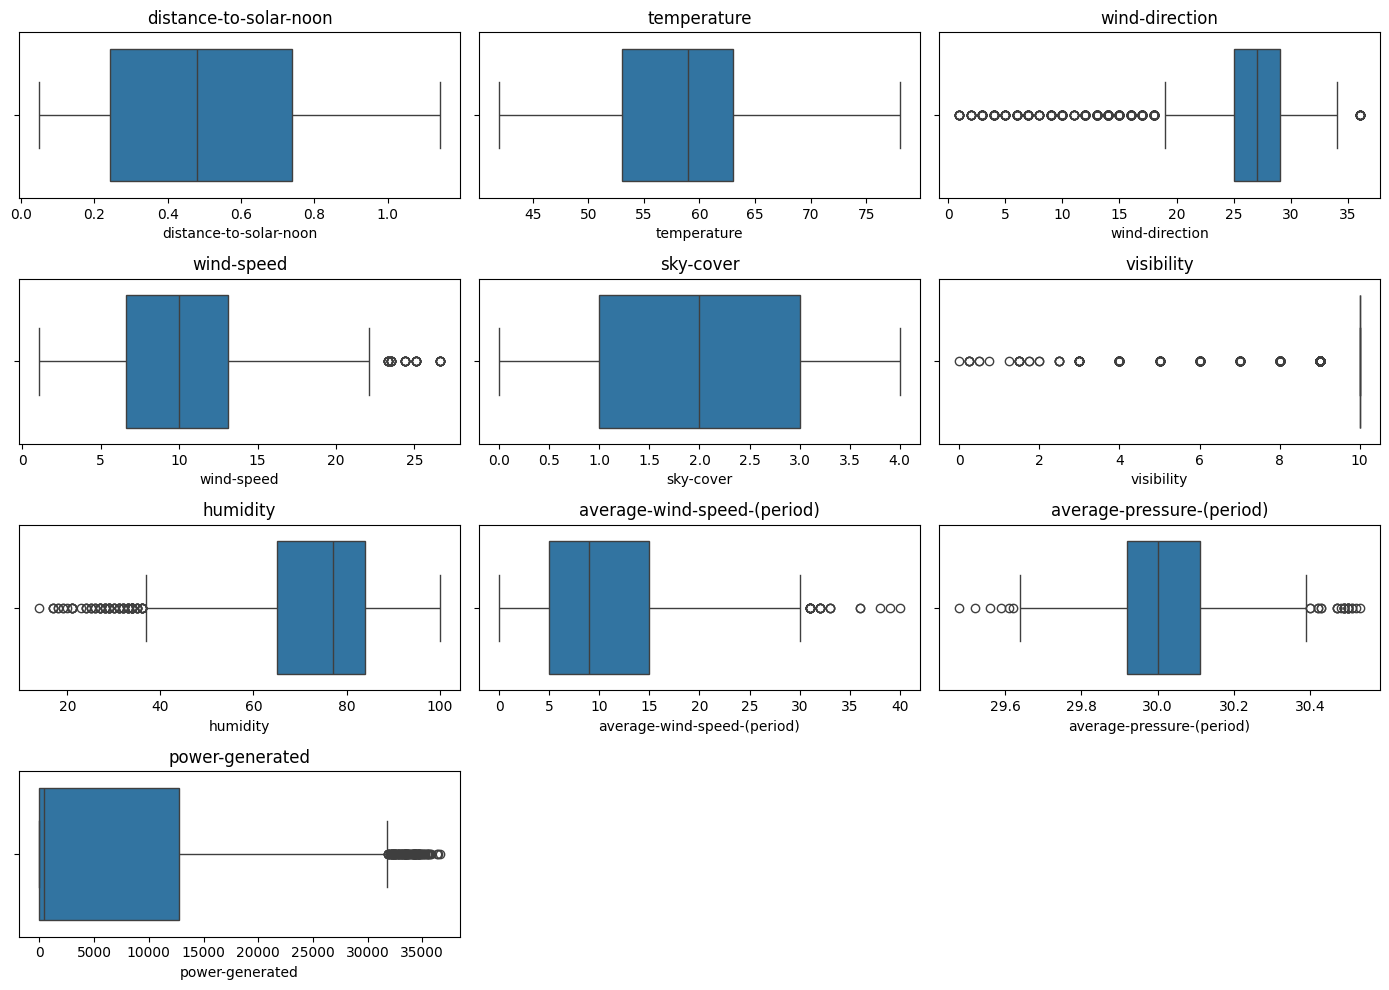

In [118]:
# Boxplot
import seaborn as sns
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [119]:
# OUTLIER DETECTION
outlier_summary = {}

for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_summary[col] = outliers

pd.DataFrame.from_dict(outlier_summary, orient='index', columns=["Outlier Count"])

Outlier Count
distance-to-solar-noon                   0
temperature                              0
wind-direction                         528
wind-speed                              40
sky-cover                                0
visibility                             429
humidity                                83
average-wind-speed-(period)             25
average-pressure-(period)               31
power-generated                        107

In [120]:
# Skewness Analysis

df.skew().sort_values(ascending=False)

power-generated                1.307035
average-wind-speed-(period)    0.622910
average-pressure-(period)      0.441384
wind-speed                     0.416851
distance-to-solar-noon         0.211452
temperature                    0.125916
sky-cover                      0.080284
humidity                      -0.955607
wind-direction                -1.629519
visibility                    -3.862446
dtype: float64

In [121]:
skewed_cols = df.skew().loc[lambda x: abs(x) > 0.75].index

for col in skewed_cols:
    df[col+"_log"] = np.log1p(df[col] - df[col].min() + 1)

df.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  wind-direction_log  \
0                      29.82                0            3.367296   
1                      29.85                0            3.367296   
2                      29.89             5418            3.367296   
3                      29.91            25477            3.367296   
4                      29.89            30069            3.367296   

   visibility_log  humidity_log  power-generated_log  
0        2.484907      4.143135             0.693147  
1        2.484907      4.174387             0.693147  
2        2.484907      4.060443             8.597851  
3        2.484907      3.044522            10.145610  
4        2.484907      2.197225            10.311317

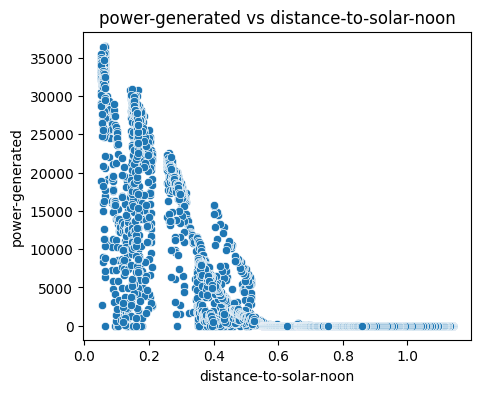

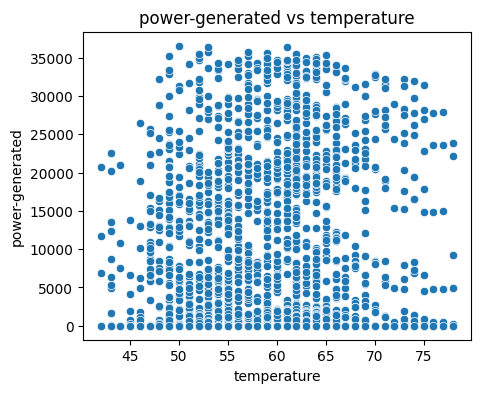

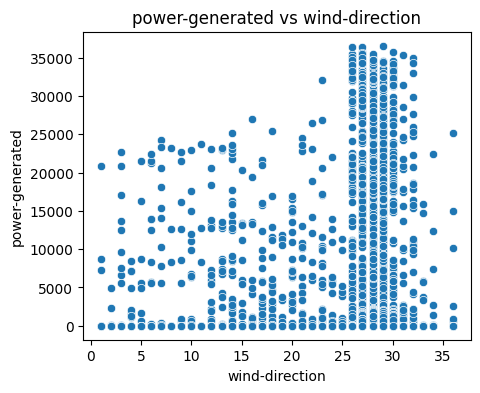

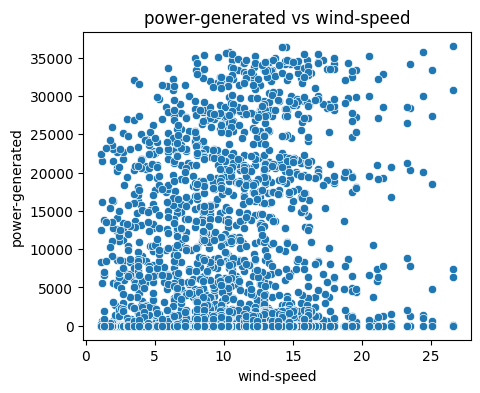

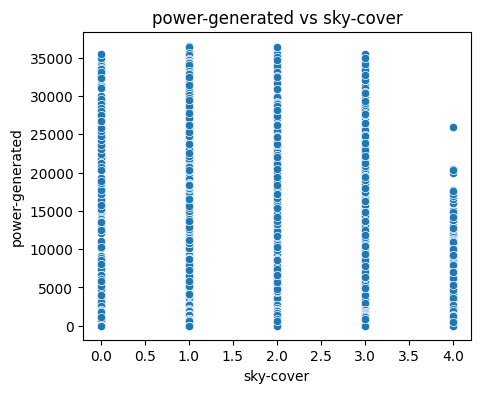

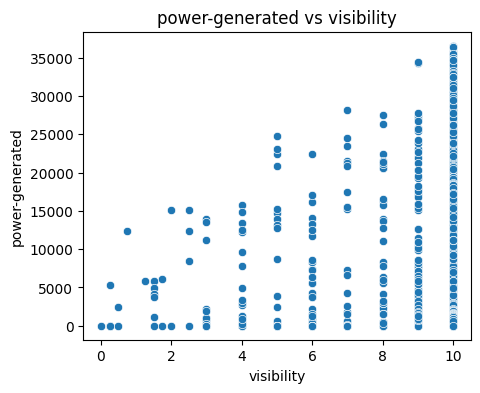

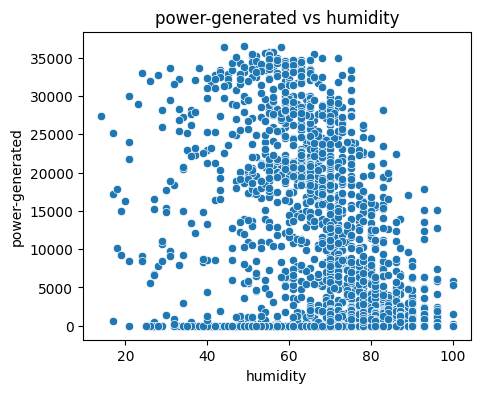

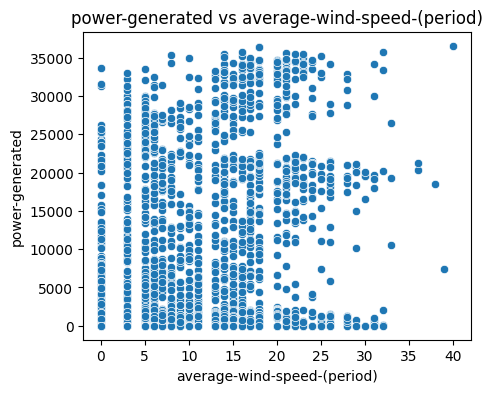

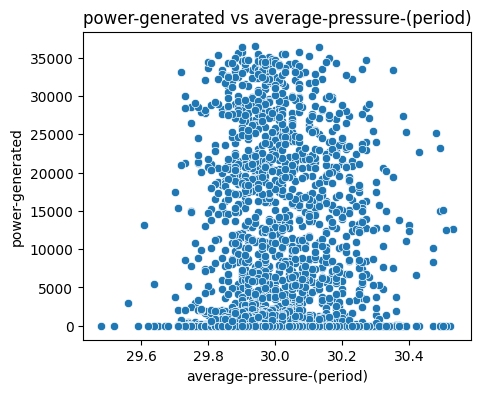

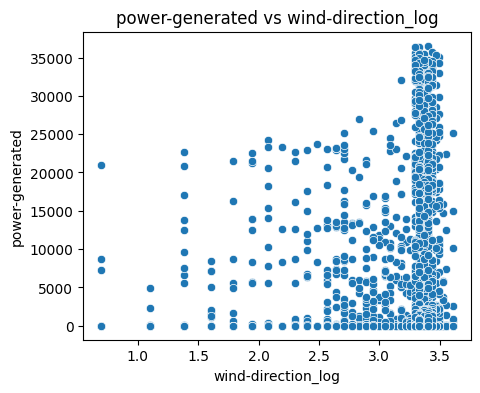

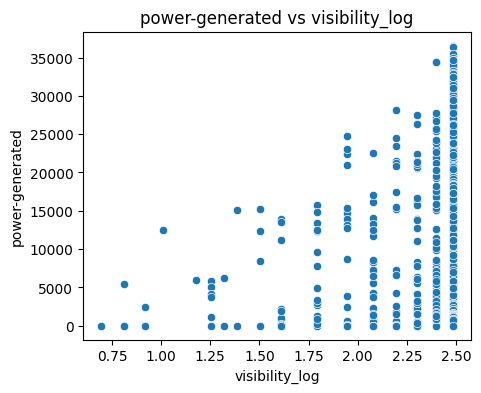

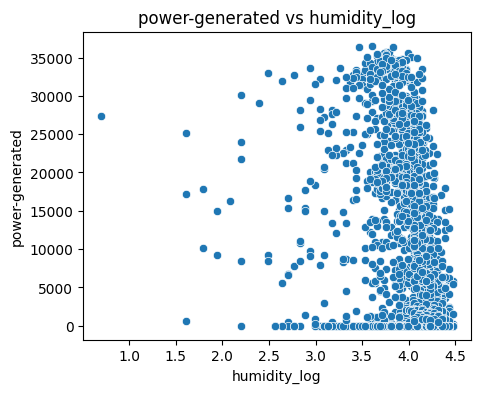

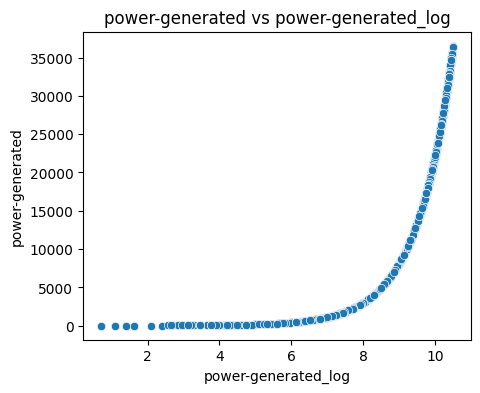

In [122]:
# Bivariate Analysis 

#Scatterplot
target = "power-generated"

for col in df.select_dtypes(include=np.number).columns:
    if col != target:
        plt.figure(figsize=(5,4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{target} vs {col}")
        plt.show()

<Figure size 1200x1000 with 0 Axes>

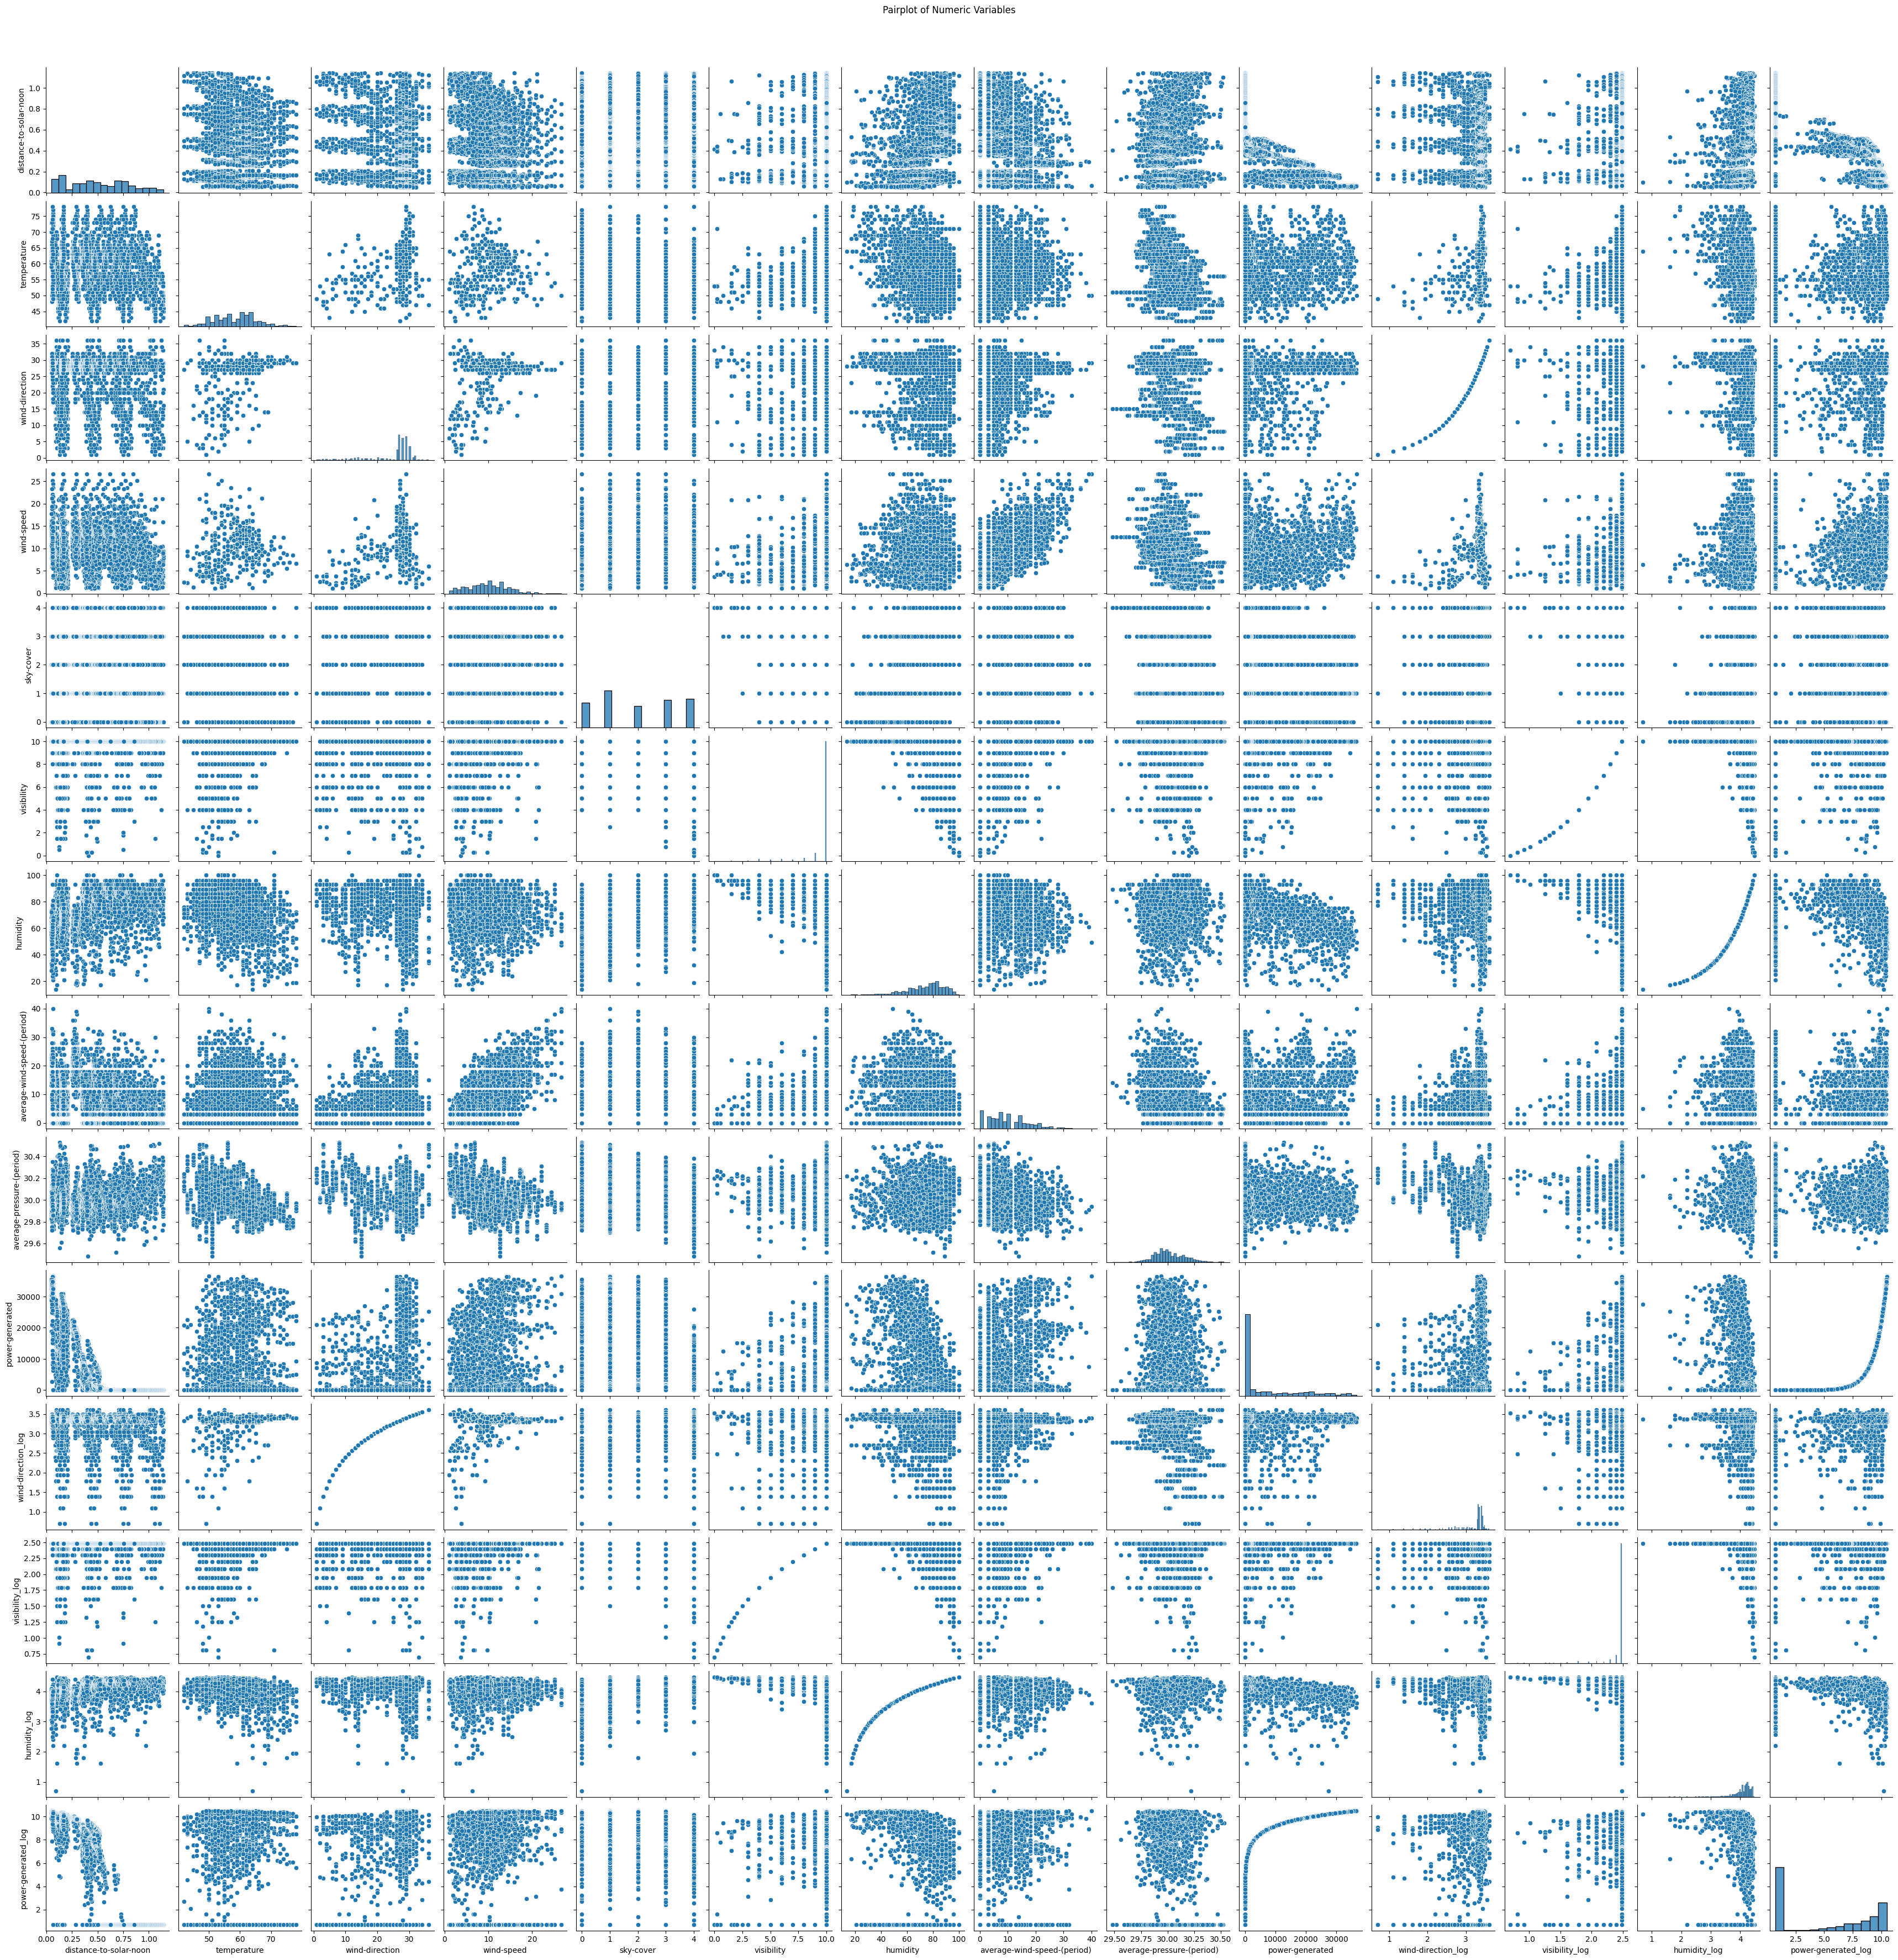

In [123]:
# Multivaraiate Analysis

# Pairplot
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.pairplot(numeric_df)
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()

In [124]:
print(df.columns)

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated', 'wind-direction_log',
       'visibility_log', 'humidity_log', 'power-generated_log'],
      dtype='object')


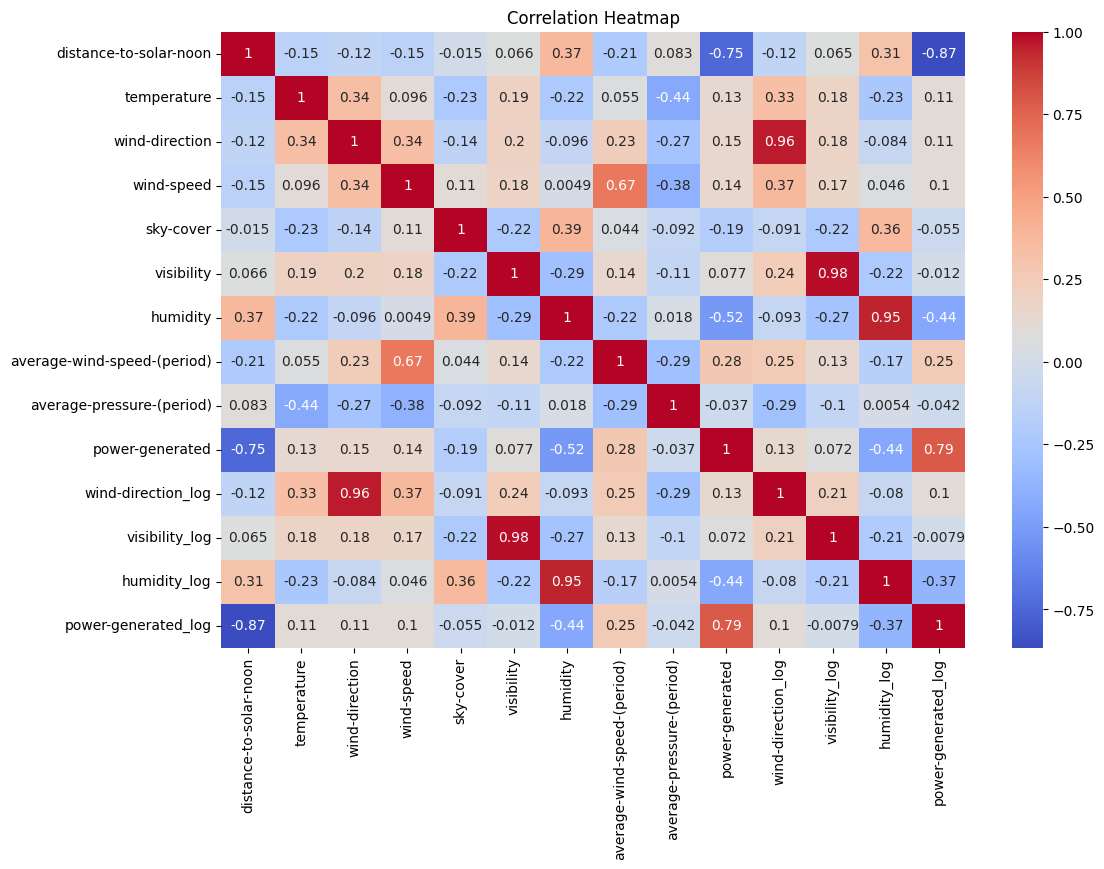

In [125]:
# Correlation & HeatMap Analysis

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [126]:
df.corr()["power-generated"].sort_values(ascending=False)

power-generated                1.000000
power-generated_log            0.785050
average-wind-speed-(period)    0.278174
wind-direction                 0.146788
wind-speed                     0.142641
wind-direction_log             0.132813
temperature                    0.132193
visibility                     0.076536
visibility_log                 0.072286
average-pressure-(period)     -0.036771
sky-cover                     -0.187236
humidity_log                  -0.441095
humidity                      -0.522545
distance-to-solar-noon        -0.746681
Name: power-generated, dtype: float64

In [127]:
# Data Scaling

from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)
print("\nScaled Data (first 5 rows):")
scaled_df.head()


Scaled Data (first 5 rows):


distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                1.196765     1.539688        0.440639   -0.536861  -1.407962   
1                0.420310     1.539688        0.440639   -0.536861  -1.407962   
2               -0.356146     1.539688        0.440639   -0.536861  -1.407962   
3               -1.132602     1.539688        0.440639   -0.536861  -1.407962   
4               -1.469066     1.539688        0.440639   -0.536861  -1.407962   

   visibility  humidity  average-wind-speed-(period)  \
0    0.319659  0.098597                    -0.293260   
1    0.319659  0.231271                    -0.706466   
2    0.319659 -0.233088                    -1.395142   
3    0.319659 -2.687555                    -1.395142   
4    0.319659 -3.483598                    -0.981936   

   average-pressure-(period)  power-generated  wind-direction_log  \
0                  -1.392859        -0.676960            0.412377   
1                  -1.181564        -0.676960            0.412377   
2                  -0.899837        -0.151480            0.412377   
3                  -0.758974         1.793999            0.412377   
4                  -0.899837         2.239367            0.412377   

   visibility_log  humidity_log  power-generated_log  
0        0.283309      0.201037            -1.047660  
1        0.283309      0.294050            -1.047660  
2        0.283309     -0.045067             0.853662  
3        0.283309     -3.068622             1.225945  
4        0.283309     -5.590327             1.265802

In [128]:
# VIF Multicollinearity

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_cols = [
    col for col in df.columns
    if df[col].dtype != "O" and "_log" not in col and col != "power-generated"
]

df[vif_cols] = df[vif_cols].replace([np.inf, -np.inf], np.nan)
df[vif_cols] = df[vif_cols].fillna(df[vif_cols].median())

vif_cols = [col for col in vif_cols if df[col].nunique() > 1]

X = df[vif_cols]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                       Feature         VIF
0       distance-to-solar-noon    5.029500
1                  temperature   87.717605
2               wind-direction   18.259688
3                   wind-speed   11.576310
4                    sky-cover    3.909975
5                   visibility   60.764445
6                     humidity   41.806302
7  average-wind-speed-(period)    6.016500
8    average-pressure-(period)  179.349867


In [129]:
# ---------------------
# Model Development 
# ---------------------
# Task 1: Define Features (X) and Target (y)
# Replace with your exact target column name
target = "power-generated_log"

X = df.drop(columns=[target])
y = df[target]

In [130]:
# Task 2: Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [131]:
# Task 3: Feature Scaling (Very Important for Regression Models)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# MODEL 1: Linear Regression
# --------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Linear Regression Model
lr = LinearRegression()

# Train
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Metrics
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

# Print Results
print("Linear Regression R2 Score      :", lr_r2)
print("Linear Regression MSE           :", lr_mse)
print("Linear Regression RMSE          :", lr_rmse)


Linear Regression R2 Score      : 0.7697347249537434
Linear Regression MSE           : 3.9464031742015404
Linear Regression RMSE          : 1.9865556056152922


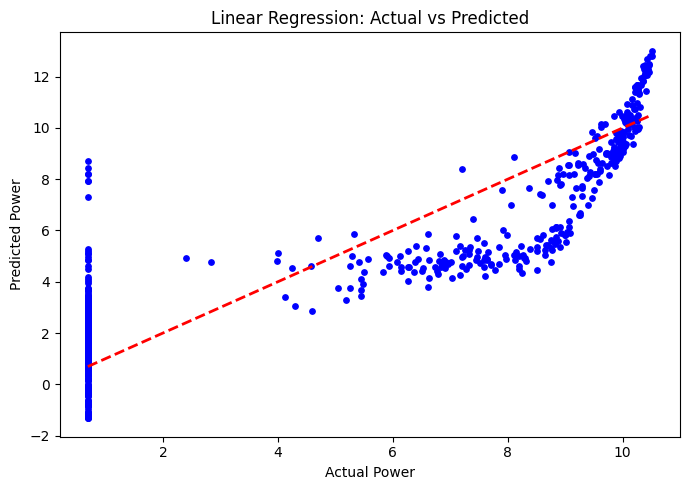

In [133]:
# Linear Regression – Scatter Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr, color="blue", s=15)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.tight_layout()
plt.show()

In [134]:
# MODEL 2: Decision Tree Regressor
# --------------------------------
# MODEL 2: Decision Tree Regressor
# --------------------------------
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_r2 = r2_score(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
print("Decision Tree R2 Score      :", dt_r2)
print("Decision Tree MSE           :", dt_mse)
print("Decision Tree RMSE          :", dt_rmse)


Decision Tree R2 Score      : 0.9999873207657213
Decision Tree MSE           : 0.00021730315347772076
Decision Tree RMSE          : 0.01474120597094148


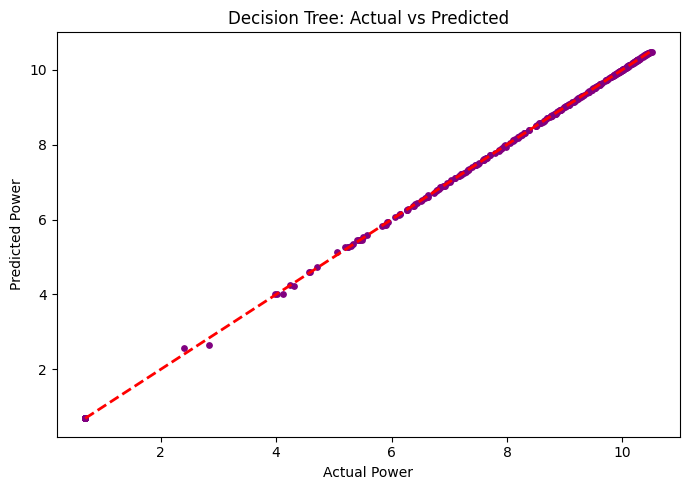

In [135]:
# Decision Tree - Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_dt, color="purple", s=15)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.tight_layout()
plt.show()

In [136]:
# MODEL 3: Random Forest Regressor
# --------------------------------
# Train & evaluate (simple)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest R2 Score      :", rf_r2)
print("Random Forest MSE           :", rf_mse)
print("Random Forest RMSE          :", rf_rmse)


Random Forest R2 Score      : 0.9999964502257793
Random Forest MSE           : 6.083783257991967e-05
Random Forest RMSE          : 0.0077998610615779345


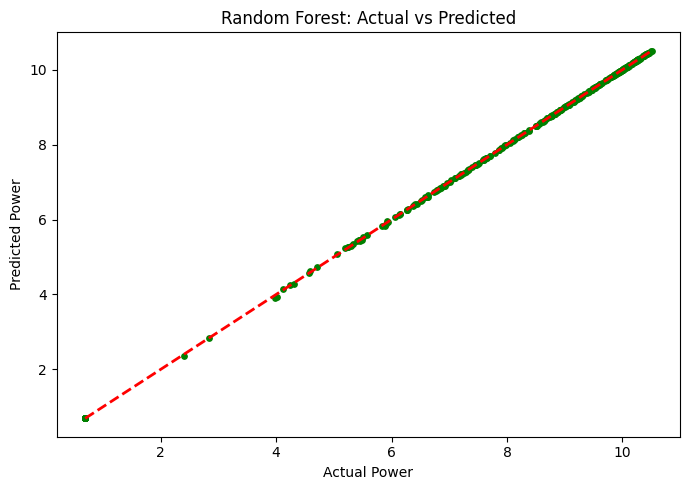

In [137]:
# Random Forest Regressor – Scatter Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, color="green", s=15)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.tight_layout()
plt.show()

In [138]:
# MODEL 4: Support Vector Regressor (SVM/SVR)

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
svr = SVR(kernel="rbf", C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_rmse = np.sqrt(svr_mse)
print("SVR R2 Score      :", svr_r2)
print("SVR MSE           :", svr_mse)
print("SVR RMSE          :", svr_rmse)


SVR R2 Score      : 0.8402547579378264
SVR MSE           : 2.737795050561201
SVR RMSE          : 1.654628372342624


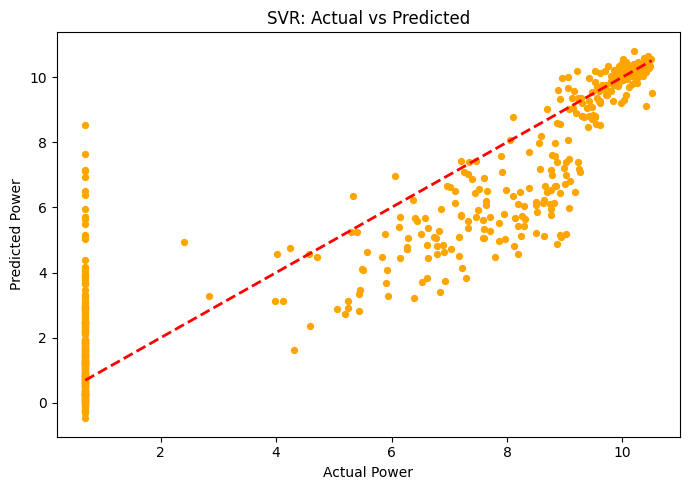

In [139]:
# Support Vector Regressor (SVR) — Scatter Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_svr, color="orange", s=18)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', linewidth=2)

plt.title("SVR: Actual vs Predicted")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.tight_layout()
plt.show()